# E-Commerce Sales Analysis :-

In [9]:
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = 'plotly_white'

In [37]:
df = pd.read_csv("Sample_Data.csv", encoding="latin1", dtype={'Quantity':'int8', 'Discount':'float16'})
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.000000,41.9136
1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.000000,219.5820
2,CA-2016-138688,06-12-2016,6-16-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.000000,6.8714
3,US-2015-108966,10-11-2015,10-18-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.449951,-383.0310
4,US-2015-108966,10-11-2015,10-18-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.199951,2.5164


In [38]:
df.columns.values

array(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype=object)

## Seeing the descriptive staticstics of the data:

In [39]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156250,28.656896
std,32063.693350,623.245101,2.225110,0.206421,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.199951,8.666500
75%,90008.000000,209.940000,5.000000,0.199951,29.364000
max,99301.000000,22638.480000,14.000000,0.799805,8399.976000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int8   
 18  Discount

## Converting the date columns from string to DataTime.

In [41]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [42]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [44]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.000000,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.000000,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.000000,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.449951,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.199951,2.5164


## Creating 3 more columns for better Analysis (Year, month, weekday).

In [45]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Day of Week'] = df['Order Date'].dt.dayofweek

In [83]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.000000,41.9136,11,2016,1
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.000000,219.5820,11,2016,1
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.000000,6.8714,6,2016,6
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.449951,-383.0310,10,2015,6
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.199951,2.5164,10,2015,6


## Calculating the monthly sales of the store and identify which month had the highest sales and which month had the lowest sales.

In [50]:
sales_by_month = df.groupby('Order Month')['Sales'].sum().reset_index()
sales_by_month

,Order Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


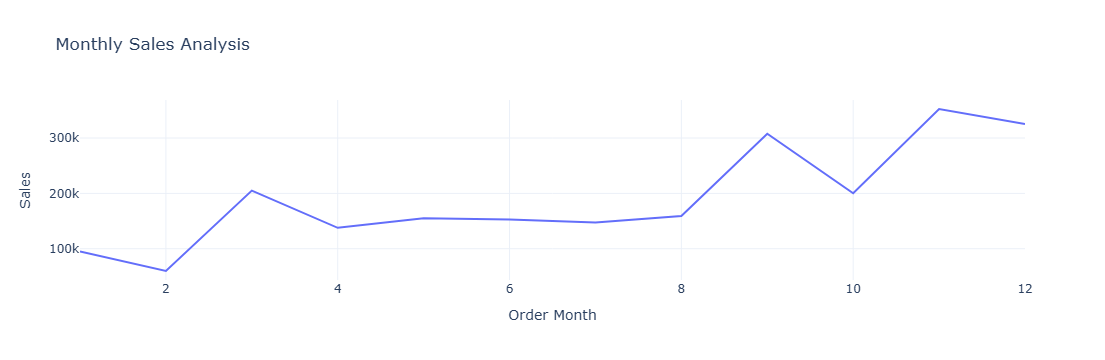

In [51]:
fig = px.line(sales_by_month,
             x = 'Order Month',
             y = 'Sales',
             title = "Monthly Sales Analysis")
fig.show()

## Analyzing sales based on product categories and determine which category has the lowest sales and which category has the highest sales.

In [53]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


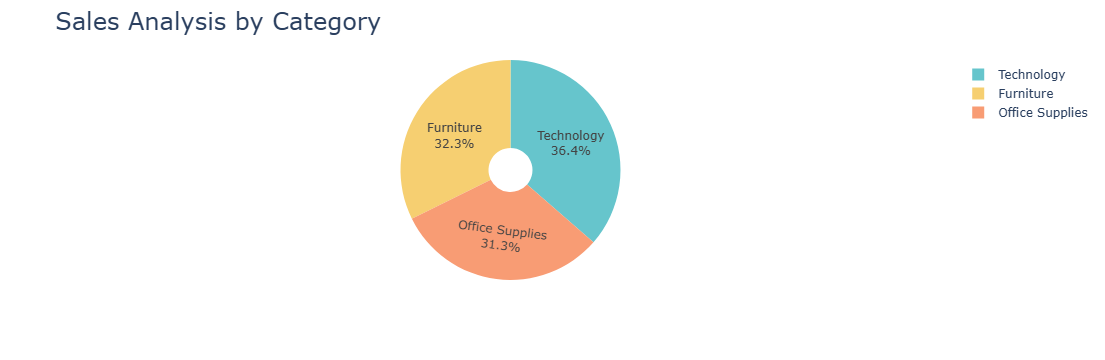

In [55]:
fig = px.pie(sales_by_category, 
             values='Sales', 
             names='Category', 
             hole=0.2,
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Category', title_font=dict(size=24))

fig.show()

## The sales analysis based on sub-categories.

In [59]:
sales_by_subcategory = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
sales_by_subcategory

,Category,Sub-Category,Sales
0,Furniture,Bookcases,114879.9963
1,Furniture,Chairs,328449.1030
2,Furniture,Furnishings,91705.1640
3,Furniture,Tables,206965.5320
4,Office Supplies,Appliances,107532.1610
5,Office Supplies,Art,27118.7920
6,Office Supplies,Binders,203412.7330
7,Office Supplies,Envelopes,16476.4020
8,Office Supplies,Fasteners,3024.2800
9,Office Supplies,Labels,12486.3120


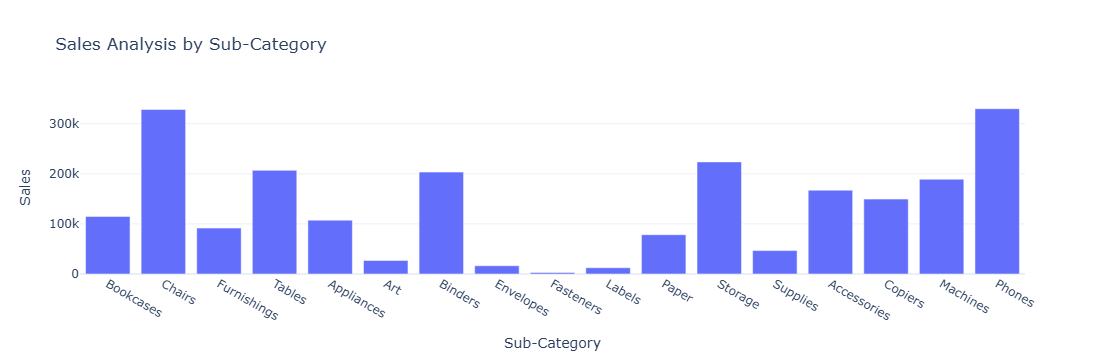

In [60]:
fig = px.bar(sales_by_subcategory, 
             x='Sub-Category', 
             y='Sales',
            title="Sales Analysis by Sub-Category")
fig.show()

## Analyzing the monthly profit from sales and which month had the highest profit.

In [62]:
monthly_profit = df.groupby('Order Month')['Profit'].sum().reset_index()
monthly_profit

,Order Month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


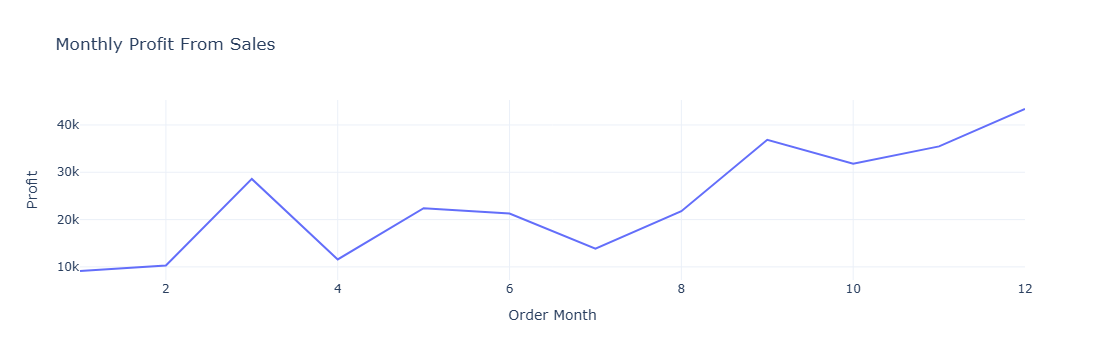

In [63]:
fig = px.line(monthly_profit, 
              x='Order Month', 
              y='Profit',
              title='Monthly Profit From Sales')
fig.show()

## Analyzing the profit by category and sub-category.

### Profit by Category:

In [65]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()
profit_by_category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


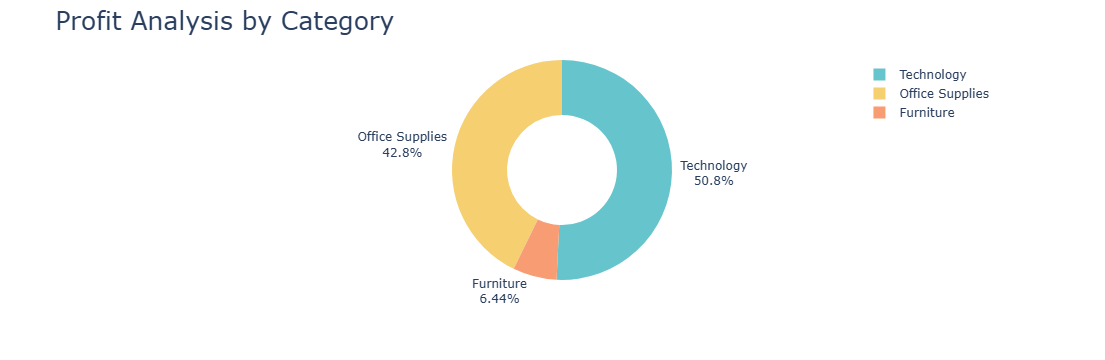

In [68]:
fig = px.pie(profit_by_category, 
             names='Category', 
             values='Profit', 
             hole=0.5,
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title="Profit Analysis by Category", title_font=dict(size=25))

fig.show()

## Profit by Sub-Category:

In [70]:
profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().reset_index()
profit_by_subcategory

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


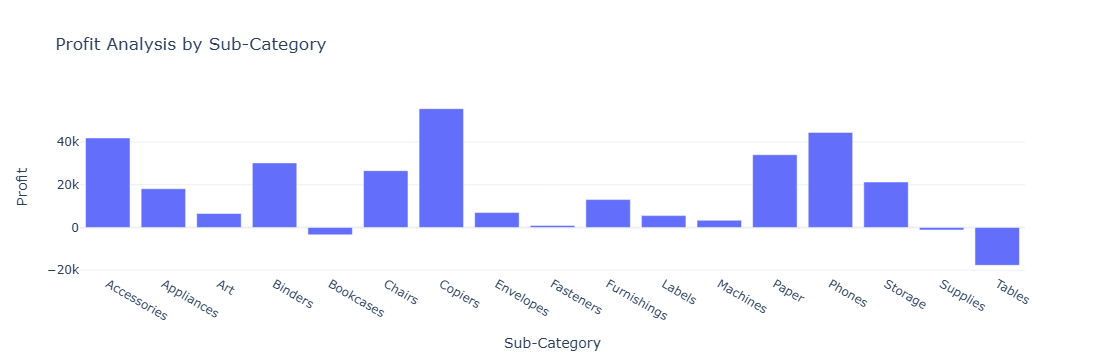

In [71]:
fig = px.bar(profit_by_subcategory,
            x='Sub-Category',
            y='Profit',
            title='Profit Analysis by Sub-Category')
fig.show()

## Analyzing the sales and profit by customer segment.

In [81]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()
sales_profit_by_segment

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


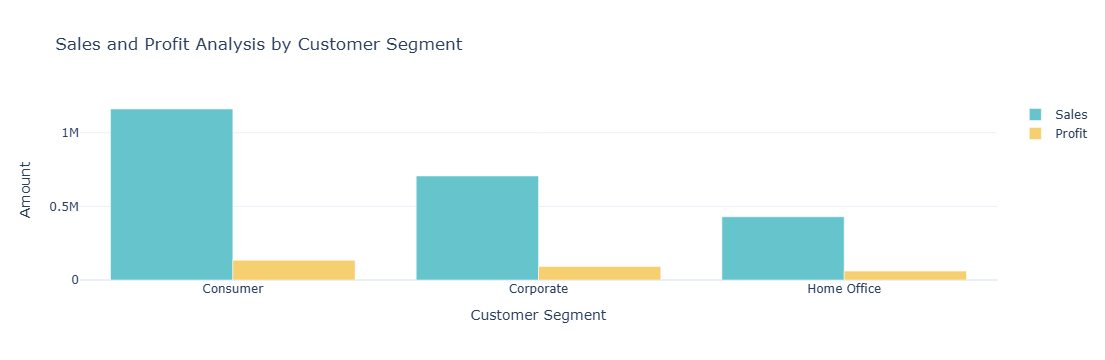

In [80]:
color_palette = colors.qualitative.Pastel

fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],
                     y=sales_profit_by_segment['Sales'],
                     name="Sales",
                     marker_color=color_palette[0]))

fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],
                     y=sales_profit_by_segment['Profit'],
                     name='Profit',
                     marker_color=color_palette[1]))

fig.update_layout(title='Sales and Profit Analysis by Customer Segment',
                  xaxis_title='Customer Segment',
                  yaxis_title='Amount')

fig.show()

## Analyzing the sales to profit ratio.

### Sales to Profit Ratio by Category.

In [84]:
sales_profit_by_category = df.groupby('Category').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()
sales_profit_by_category

,Category,Sales,Profit
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008
2,Technology,836154.0330,145454.9481


In [86]:
sales_profit_by_category['Sales_to_Profit_Ratio'] = sales_profit_by_category['Sales'] / sales_profit_by_category['Profit']
sales_profit_by_category[['Category', 'Sales_to_Profit_Ratio']]

,Category,Sales_to_Profit_Ratio
0,Furniture,40.214017
1,Office Supplies,5.870213
2,Technology,5.748543


### Sales to Profit Ratio by Segment.

In [88]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()
sales_profit_by_segment

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


In [90]:
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment["Sales"] / sales_profit_by_segment["Profit"]
sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']]

,Segment,Sales_to_Profit_Ratio
0,Consumer,8.659471
1,Corporate,7.677245
2,Home Office,7.125416


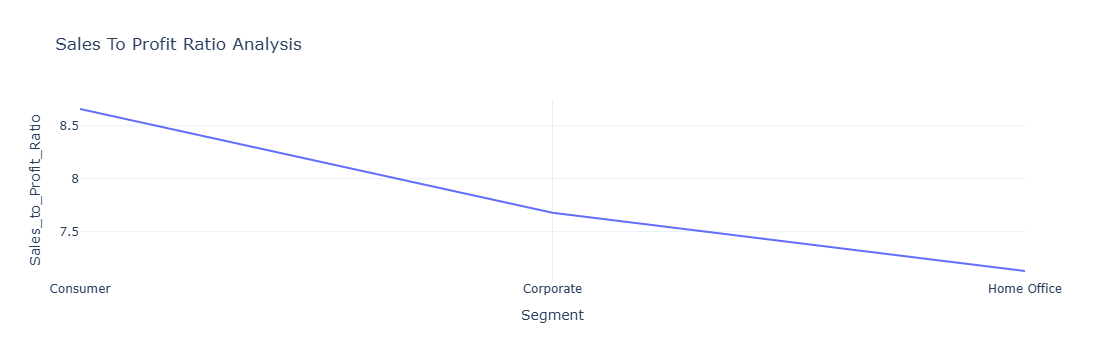

In [93]:
fig = px.line(sales_profit_by_segment,
             x='Segment',
             y='Sales_to_Profit_Ratio',
             title='Sales To Profit Ratio Analysis')
fig.show()